# Question 1
---
Fix $n \in \mathbb Z^+$. Let 

$$\theta = \begin{pmatrix} \theta_1 \\ \vdots \\ \theta_n \end{pmatrix}$$ 

be a vector of probabilities that we're interested in. Let 

$$x = \begin{pmatrix} x_1 \\ \vdots \\ x_m \end{pmatrix}$$

be our data vector. Our likelihood is a binomial distribution, which has a PMF of the form

$$p(x|\theta, n) = c_1\prod_{i=1}^m\theta^{x_i}(1-\theta)^{n-x_i}$$

for some constant $c_1$. Our prior is the discrete uniform distribution

$$p(\theta) = \begin{cases} \frac{1}{101} & \text{ if } \theta = \frac{i}{100} \text{ for } i = 0, 1, \ldots, 100 \\ 0 & \text{ otherwise }\end{cases}$$

When computing the posterior distribution, the marginal likelihood is a constant, which we'll denote $c_2$. Thus, by Bayes Theorem we have 

\begin{align*}
p\left(\theta = \frac{i}{100}|x, n\right) &= \frac{\left(c_1\prod_{i=1}^m\left(\frac{i}{100}\right)^{x_i}\left(1-\frac{i}{100}\right)^{n-x_i}\right)\frac{1}{101}}{c_2} \\
&= c\prod_{i=1}^m\left(\frac{i}{100}\right)^{x_i}\left(1-\frac{i}{100}\right)^{n-x_i}
\end{align*}

where $c = \frac{c_1}{101c_2}$. The above probability equals $0$ for all other $\theta$. Our posterior is a discrete distribution that's reweighted by the binomial likelihood. 

# Question 2
---

The posteriors in the question are the beta$(\alpha + x_j^{(t)}, \beta + n_j^{(t)} - x_j^{(t)})$ distribution.

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import pandas as pd
import random

random.seed(10)
np.random.seed(15)


# Initialize parameters. 

alpha, beta, = 1,1 # set hyperparameters for uninformative beta prior

x1,x2,n1,n2 = 0,0,0,0 # Running counts for each coin: n_j total flips, x_j successes

theta_true_1, theta_true_2 = 0.35, 0.60 # "True" success probabilities

m = 500 # number of iterations

s = 10000 # sample size per iteration

learning = [] # will store data from the simulation here

# Perform simulation

for t in range(m):
    # Sample from the Beta posterior of the current iteration for each coin
    samples1 = np.random.beta(alpha + x1, beta + (n1 - x1), size = s)
    samples2 = np.random.beta(alpha + x2, beta + (n2 - x2), size = s)
    
    # Estimate the probability that theta1 < theta2
    prob_1_less_2 = np.mean(samples1 < samples2)
    
    # Flip coin 2 with the probability above, else flip coin 1
    if np.random.binomial(1, prob_1_less_2, 1) == 1:
        # Flip coin 2
        outcome = np.random.binomial(1,  theta_true_2, 1) == 1  # True success/fail
        n2 += 1
        x2 += int(outcome)
    else:
        # Flip coin 1
        outcome = np.random.binomial(1,  theta_true_1, 1) == 1 # True success/fail
        n1 += 1
        x1 += int(outcome)
        
    # Store iteration data
    learning.append({
        "iteration": t,
        "prob_1_less_2": prob_1_less_2,
        "n1": n1,
        "x1": x1,
        "n2": n2,
        "x2": x2
    })

results = pd.DataFrame(learning)

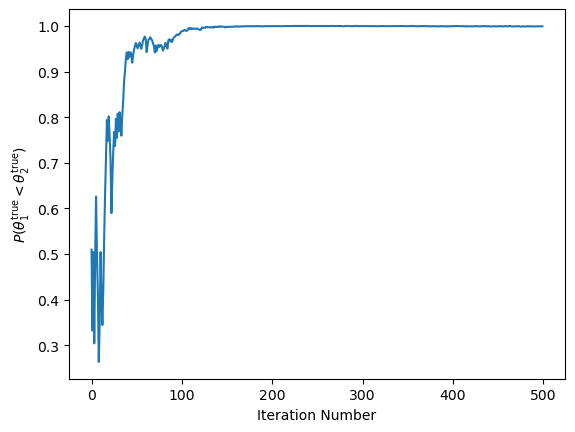

In [27]:
plt.xlabel("Iteration Number")
plt.ylabel("$P(\\theta_1^\\text{true}<\\theta_2^\\text{true})$")
plt.plot(results.iteration, results.prob_1_less_2)

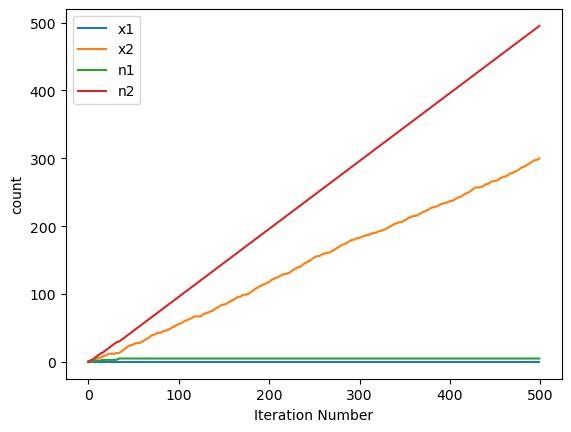

In [12]:
plt.xlabel("Iteration Number")
plt.ylabel("count")
plt.plot(results.iteration, results.x1, label = "x1")
plt.plot(results.iteration, results.x2, label = "x2")
plt.plot(results.iteration, results.n1, label = "n1")
plt.plot(results.iteration, results.n2, label = "n2")
plt.legend()

# Question 3
---
We begin with analysis 1

In [31]:
random.seed(20)
np.random.seed(25)

# Initialize parameters. 

alpha, beta = 1,1 # set hyperparameters for uninformative beta prior

theta_true_1, theta_true_2, theta_true_3 = 0.34, 0.81, 0.58 # "True" success probabilities

m = 500 # number of iterations

s = 10000 # sample size per iteration


x1, n1, x2, n2 = 0,0,0,0 # Running counts for each coin: n_j total flips, x_j successes

learning = [] # will store data from the simulation here

# Perform simulation for theta_1 and theta_2

for t in range(m):
    # Sample from the Beta posterior of the current iteration for each coin
    samples1 = np.random.beta(alpha1 + x1, beta1 + (n1 - x1), size = s)
    samples2 = np.random.beta(alpha2 + x2, beta2 + (n2 - x2), size = s)
    
    # Estimate the probability that theta1 < theta2
    prob_1_less_2 = np.mean(samples1 < samples2)
    
    # Flip coin 2 with the probability above, else flip coin 1
    if np.random.binomial(1, prob_1_less_2, 1) == 1:
        # Flip coin 2
        outcome = np.random.binomial(1,  theta_true_2, 1) == 1  # True success/fail
        n2 += 1
        x2 += int(outcome)
    else:
        # Flip coin 1
        outcome = np.random.binomial(1,  theta_true_1, 1) == 1 # True success/fail
        n1 += 1
        x1 += int(outcome)
        
    # Store iteration data
    learning.append({
        "iteration": t,
        "prob_1_less_2": prob_1_less_2,
        "n1": n1,
        "x1": x1,
        "n2": n2,
        "x2": x2,
    })

results1_2 = pd.DataFrame(learning)

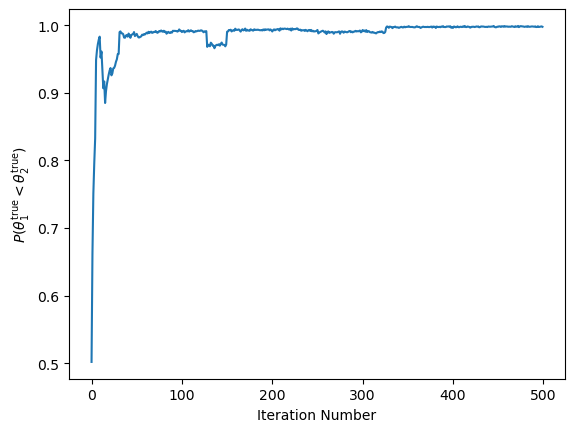

In [32]:
plt.xlabel("Iteration Number")
plt.ylabel("$P(\\theta_1^\\text{true}<\\theta_2^\\text{true})$")
plt.plot(results1_2.iteration, results1_2.prob_1_less_2)

In [37]:
random.seed(30)
np.random.seed(35)

x1, x3, n1, n3 = 0,0,0,0

learning = []

# Perform simulation for theta_1 and theta_3

for t in range(m):
    # Sample from the Beta posterior of the current iteration for each coin
    samples1 = np.random.beta(alpha + x1, beta + (n1 - x1), size = s)
    samples3 = np.random.beta(alpha + x3, beta + (n3 - x3), size = s)
    
    # Estimate the probability that theta1 < theta2
    prob_1_less_3 = np.mean(samples1 < samples3)
    
    # Flip coin 3 with the probability above, else flip coin 1
    if np.random.binomial(1, prob_1_less_3, 1) == 1:
        # Flip coin 3
        outcome = np.random.binomial(1,  theta_true_3, 1) == 1  # True success/fail
        n3 += 1
        x3 += int(outcome)
    else:
        # Flip coin 1
        outcome = np.random.binomial(1,  theta_true_1, 1) == 1 # True success/fail
        n1 += 1
        x1 += int(outcome)
        
    # Store iteration data
    learning.append({
        "iteration": t,
        "prob_1_less_3": prob_1_less_3,
        "n1": n1,
        "x1": x1,
        "n3": n3,
        "x3": x3,
    })
    
results1_3 = pd.DataFrame(learning)

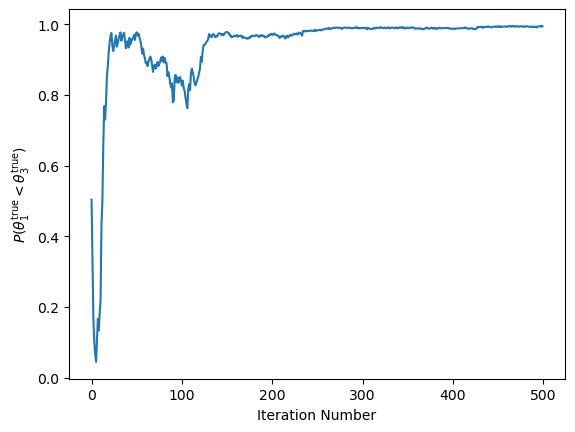

In [38]:
plt.xlabel("Iteration Number")
plt.ylabel("$P(\\theta_1^\\text{true}<\\theta_3^\\text{true})$")
plt.plot(results1_3.iteration, results1_3.prob_1_less_3)

In [49]:
random.seed(40)
np.random.seed(45)

x2, x3, n2, n3 = 0,0,0,0

learning = []

# Perform simulation for theta_2 and theta_3

for t in range(m):
    # Sample from the Beta posterior of the current iteration for each coin
    samples2 = np.random.beta(alpha + x2, beta + (n2 - x2), size = s)
    samples3 = np.random.beta(alpha + x3, beta + (n3 - x3), size = s)
    
    # Estimate the probability that theta1 < theta2
    prob_2_less_3 = np.mean(samples2 < samples3)
    
    # Flip coin 3 with the probability above, else flip coin 1
    if np.random.binomial(1, prob_2_less_3, 1) == 1:
        # Flip coin 3
        outcome = np.random.binomial(1,  theta_true_3, 1) == 1  # True success/fail
        n3 += 1
        x3 += int(outcome)
    else:
        # Flip coin 2
        outcome = np.random.binomial(1,  theta_true_2, 1) == 1 # True success/fail
        n2 += 1
        x2 += int(outcome)
        
    # Store iteration data
    learning.append({
        "iteration": t,
        "prob_2_less_3": prob_2_less_3,
        "n2": n1,
        "x2": x2,
        "n3": n3,
        "x3": x3,
    })
    
results2_3 = pd.DataFrame(learning)

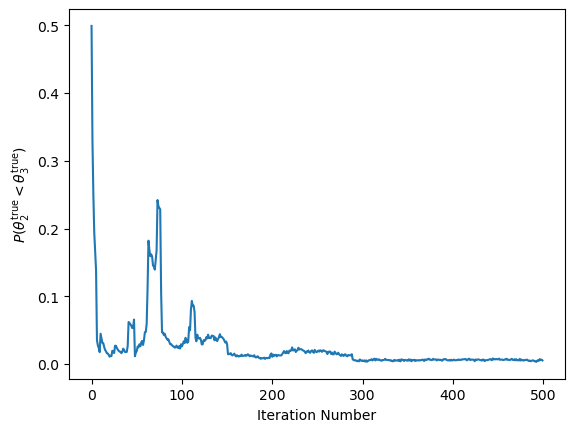

In [50]:
plt.xlabel("Iteration Number")
plt.ylabel("$P(\\theta_2^\\text{true}<\\theta_3^\\text{true})$")
plt.plot(results2_3.iteration, results2_3.prob_2_less_3)

From the analysis above, we can see that all three simulations, which were performed indepdently, are able to correctly identify the correct order of true probabilities (ie $\theta_1^\text{true} < \theta_3^\text{true} < \theta_2^\text{true}$).

Now we perform analysis 2.

In [64]:
random.seed(50)
np.random.seed(55)


# Initialize parameters. 

alpha = np.array([1, 1, 1])  # Set hyperparameter for uninformative dirichlet prior

x1, x2, x3, n1, n2, n3 = 0,0,0,0,0,0 # Running counts for each coin: n_j total flips, x_j successes

theta_true_1, theta_true_2, theta_true_3 = 0.34, 0.81, 0.58 # "True" success probabilities

m = 500 # number of iterations

s = 10000 # sample size per iteration

learning = [] # will store data from the simulation here

# Perform simulation

for t in range(m):
    # Draw sample from the dirichlet posterior of the current iteration
    sample = np.random.dirichlet(alpha + np.array([x1, x2, x3]), s)
    
    # Estimate theta_1, theta_2, theta_3
    theta_1 = np.mean(sample[:, 0])
    theta_2 = np.mean(sample[:, 1])
    theta_3 = np.mean(sample[:, 2])
    
    # Choose which coin to flip
    coin = np.random.multinomial(1, np.array([theta_1, theta_2, theta_3]), 1)
    
    if coin[:, 0] == 1:
        # Flip coin 1
        outcome = np.random.binomial(1,  theta_true_1, 1) == 1  # True success/fail
        n1 += 1
        x1 += int(outcome)
    elif coin[:, 1] == 1:
        # Flip coin 2
        outcome = np.random.binomial(1,  theta_true_2, 1) == 1  # True success/fail
        n2 += 1
        x2 += int(outcome)
    else:
        # Flip coin 3
        outcome = np.random.binomial(1, theta_true_3, 1) == 1  # True success/fail
        n3 += 1
        x3 += int(outcome)
        
    # Store iteration data
    learning.append({
        "iteration": t,
        "theta_1": theta_1,
        "theta_2": theta_2,
        "theta_3": theta_3,
        "n1": n1,
        "x1": x1,
        "n2": n2,
        "x2": x2,
        "n3": n3,
        "x3": x3
    })

results_dir = pd.DataFrame(learning)

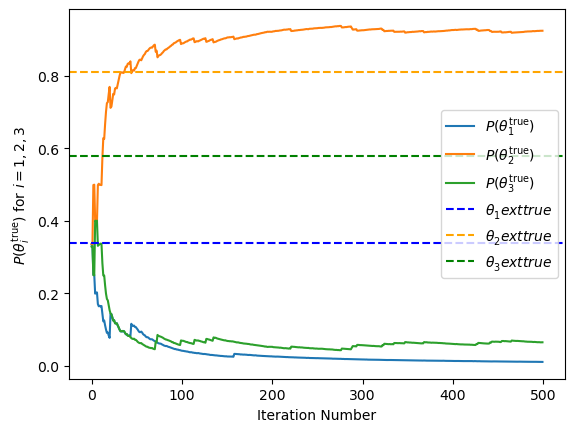

In [66]:
plt.xlabel("Iteration Number")
plt.ylabel("$P(\\theta_i^\\text{true})$ for $i = 1, 2, 3$")
plt.plot(results_dir.iteration, results_dir.theta_1, label = "$P(\\theta_1^\\text{true})$")
plt.plot(results_dir.iteration, results_dir.theta_2, label = "$P(\\theta_2^\\text{true})$")
plt.plot(results_dir.iteration, results_dir.theta_3, label = "$P(\\theta_3^\\text{true})$")
plt.axhline(theta_true_1, color = 'blue', linestyle = '--', label = "$\\theta_1^\\text{true}$")
plt.axhline(theta_true_2, color = 'orange', linestyle = '--', label = "$\\theta_2^\\text{true}$")
plt.axhline(theta_true_3, color = 'green', linestyle = '--', label = "$\\theta_3^\\text{true}$")
plt.legend()

Analysis 2 seems to work fine when it comes to determining the relative order of the true thetas, but it fails when attempting to infer the values of the true thetas. This is because when modelling the outcomes for the three alternatives as a single multinomial process, we force 

$$\theta_1^\text{true} + \theta_2^\text{true}+ \theta_3^\text{true} = 1$$

which simply isn't true in our case. In contrast, in analysis 1 we treated each pair independently, thus not enforcing the equality above. I conclude that analysis 1 is more appropriate, but if the entities under consideration are mutually exclusive, then it makes more sense to use analysis 2 because the equality above needs to be taken into account.

_______________________________________________________________________________________________________________________________
A real-world application of the Bayesian Multi-Armed Bandit can be for deciding which of three restaurants is best within a time limit of 30 days. 

An exploration-only stragety would mean spending 10 days in each restaurant, which may not be the optimal strategy because a clear winner may be evident before the 30 days are up. There'd be no time to go to stick to the better restaurant.

On the other hand, an exploitation-only strategy would mean first spending 1 day in each restaruant, then only go to whichever restaurant was the best. This may not be optimal either because it's possible that by chance the actual best restaruant delivered a poor performance, so the "best" restaruant based on limited data may not actually be the best. 

By using the Bauesian Bandit, there's a mix of exploration and exploitation so that once enough exploration is done to infer the best restaruant, there's still time to exploit the best restaurant.